# Исследование объявлений о продаже квартир

### Задача:
Провести анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов, определить рыночную стоимость квартир, установить параметры, влияющие на стоимость.

### Структура проекта: 
1. Знакомство с данными
2. Предобработка данных
3. Посчитаем следующие параметры: 
    - цена квадратного метра; 
    - день недели, месяц и год публикации объявления;
    - этаж квартиры (первый, последний, другой)
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. Исследовательский анализ данных
5. Резюме проекта

### Шаг 1. Загрузим файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
flat = pd.read_csv('/datasets/real_estate_data.csv')

In [2]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


In [3]:
flat.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [4]:
flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
flat.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17681,14,3850000.0,45.2,2019-03-26T00:00:00,2,2.56,5.0,30.1,5,NaN,...,6.8,NaN,Санкт-Петербург,18233.0,16034.0,0.0,NaN,0.0,NaN,18.0
19620,10,4300000.0,33.0,2018-02-01T00:00:00,1,NaN,5.0,9.0,1,NaN,...,17.0,NaN,Санкт-Петербург,22525.0,2976.0,2.0,251.0,3.0,220.0,86.0
13724,8,6210000.0,66.3,2017-12-08T00:00:00,3,2.70,12.0,41.9,4,NaN,...,11.2,NaN,Санкт-Петербург,37793.0,12690.0,0.0,NaN,1.0,890.0,333.0
23587,7,12100000.0,88.0,2017-07-07T00:00:00,3,NaN,10.0,NaN,5,NaN,...,14.0,NaN,Санкт-Петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,200.0
14096,10,3200000.0,31.2,2017-08-03T00:00:00,1,2.50,5.0,18.3,1,NaN,...,6.3,NaN,Санкт-Петербург,42636.0,15139.0,0.0,NaN,0.0,NaN,468.0
2406,10,4290000.0,64.7,2016-01-16T00:00:00,2,2.50,16.0,29.9,4,False,...,8.4,2.0,поселок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,184.0
2181,12,6200000.0,96.1,2018-08-23T00:00:00,3,2.70,9.0,53.7,7,NaN,...,14.5,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20334,4,2600000.0,38.2,2018-03-17T00:00:00,1,2.65,4.0,NaN,2,NaN,...,NaN,NaN,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23691,11,9470000.0,72.9,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
18870,12,7950000.0,80.0,2017-09-13T00:00:00,2,NaN,4.0,36.0,2,NaN,...,15.0,NaN,Сестрорецк,54120.0,35219.0,0.0,NaN,0.0,NaN,462.0


In [5]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
flat['first_day_exposition'].min(),flat['first_day_exposition'].max()

('2014-11-27T00:00:00', '2019-05-03T00:00:00')

### Вывод

В таблице 23699 значений. Большое количество пропусков в столбцах "ceiling_height", "is_apartment", "balcony", также много пропусков в значениях с измерениями растоняний до парков,центра и пр.
Стоит акцентировать внимание ответственных сотрудников на этих пропусках. Возможно это связано с тем, что анкета не требует обязательно проставления значений в данных полях, хотя они важны для людей, которые принимают решение о покупке.
Для дальнейшей работы с данными потребуется заменить пропущенные значения, в столбцах где их отсутствие превышает 10%, переформатировать поле с датой объявления, изменить формат столбцов для проведения вычеслений.

### Шаг 2. Предобработка данных

In [7]:
flat['ceiling_height'].median()
#заполним пропуске в столбце с высотой потолков медианой
flat['ceiling_height'] = flat['ceiling_height'].fillna(2.65)
flat['ceiling_height'].isna().sum()
#проверяем

0

Заменяем пропущенные значения в столбце ceiling_height медианой (2.65) данного столбца. 

In [8]:
flat['is_apartment'].isna().sum()
#предполагаем, что большинство квартир не являются аппартаментами и заполняем пропущенные поля значением - False.
flat['is_apartment'] = flat['is_apartment'].fillna(False)
#проверяем прошла ли замена
flat['is_apartment'].unique()

array([False,  True])

Предполагаем, что большинство квартир не являются аппартаментами и заполняем пропущенные поля значением - False.

In [9]:
flat['balcony'].isna().sum()
#предполагаем, что пропущенные значения это квартиры не имеющие балконов и заполняем пропущенные поля значением - 0.
flat['balcony'] = flat['balcony'].fillna(0)
#проверяем прошла ли замена
flat['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Предполагаем, что пропущенные значения это квартиры не имеющие балконов и заполняем пропущенные поля значением - 0. Это значение не критично для исследования.

In [10]:
#flat['locality_name'].isna().sum()
flat.dropna(subset = ['locality_name'],inplace = True)
#невозможно предположить в какой локации находится объект недвижимости, 49 значений не окажут значительного 
#влияния на результаты исследования, удаляем строки с пропущенными значениями
flat['locality_name'].isna().sum()
#проверяем

0

Невозможно предположить в какой локации находится объект недвижимости, 49 значений не окажут значительного 
влияния на результаты исследования, удаляем строки с пропущенными значениями

In [11]:
flat['locality_name'] = flat['locality_name'].str.replace('ё','е')
#заменим буквы "ё" в столбце с наименование населенного пункта
flat[['locality_name']]

,locality_name
0,Санкт-Петербург
1,поселок Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
...,...
23694,Санкт-Петербург
23695,Тосно
23696,село Рождествено
23697,Санкт-Петербург


Заменим буквы "ё" на 'е' в столбце с наименование населенного пункта. Это пригодится нам в дальнейшем.

In [12]:
#функция для расчета медианы в зависимости от населенного пункта и добавлением её в пропушенные значения столбца с общим количество этажей. 

flat['new_floors_total'] = flat['floors_total']

for locality_name in flat['locality_name'].unique():
    #считаем медиану
    median_floor = flat[flat['locality_name'] == locality_name]['floors_total'].median()
    #заполняем пропуски в нужной группе
    flat.loc[(flat['new_floors_total'].isna()) & (flat['locality_name'] == locality_name), 'new_floors_total'] = median_floor
   
flat[['locality_name','floors_total','new_floors_total']].query('floors_total.isna()')

,locality_name,floors_total,new_floors_total
186,Санкт-Петербург,NaN,9.0
237,Санкт-Петербург,NaN,9.0
457,Санкт-Петербург,NaN,9.0
671,Санкт-Петербург,NaN,9.0
1757,Санкт-Петербург,NaN,9.0
...,...,...,...
22542,Санкт-Петербург,NaN,9.0
22656,Санкт-Петербург,NaN,9.0
22808,Санкт-Петербург,NaN,9.0
23590,Санкт-Петербург,NaN,9.0


Пропущенный значения в столбце с общим количеством этажей заменим медианой в зависимости от населенного пункта. Добавим новый слобец new_floors_total.

Эти данные понадобятся нам в дальнейшем.

In [13]:
flat['living_area'].isna().sum()

flat['new_living_area'] = flat['living_area']

for locality_name in flat['locality_name'].unique():
    #считаем медиану
    median_living_area = flat[flat['locality_name'] == locality_name]['living_area'].median()
    #заполняем пропуски в нужной группе
    flat.loc[(flat['new_living_area'].isna()) & (flat['locality_name'] == locality_name), 'new_living_area'] = median_living_area
   
flat[['locality_name','living_area','new_living_area']].query('living_area.isna()')

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,locality_name,living_area,new_living_area
3,Санкт-Петербург,NaN,31.30
7,Санкт-Петербург,NaN,31.30
30,Коммунар,NaN,28.70
37,поселок городского типа Красный Бор,NaN,28.20
44,Санкт-Петербург,NaN,31.30
...,...,...,...
23642,Колпино,NaN,29.95
23663,Санкт-Петербург,NaN,31.30
23670,поселок городского типа Синявино,NaN,31.00
23679,Сосновый Бор,NaN,30.00


Аналогично сделаем с полем living_area,kitchen_area также добавляем новые стобцы. Что за ошибку выдает не понял, но вроде бы всё работает как надо:-)

In [14]:
flat['kitchen_area'].isna().sum()

flat['new_kitchen_area'] = flat['kitchen_area']

for locality_name in flat['locality_name'].unique():
    #считаем медиану
    median_kitchen_area = flat[flat['locality_name'] == locality_name]['kitchen_area'].median()
    #заполняем пропуски в нужной группе
    flat.loc[(flat['new_kitchen_area'].isna()) & (flat['locality_name'] == locality_name), 'new_kitchen_area'] = median_kitchen_area
   
flat[['locality_name','kitchen_area','new_kitchen_area']].query('kitchen_area.isna()')

,locality_name,kitchen_area,new_kitchen_area
3,Санкт-Петербург,NaN,9.90
30,Коммунар,NaN,8.35
37,поселок городского типа Красный Бор,NaN,6.95
44,Санкт-Петербург,NaN,9.90
59,Санкт-Петербург,NaN,9.90
...,...,...,...
23655,Никольское,NaN,8.30
23663,Санкт-Петербург,NaN,9.90
23670,поселок городского типа Синявино,NaN,9.00
23679,Сосновый Бор,NaN,8.20


In [15]:
flat['last_price'] = flat['last_price'].astype('int')
flat['total_area'] = flat['total_area'].astype('int')
flat['new_floors_total'] = flat['new_floors_total'].astype('int')     

Переводим дробные значения цен и жилой площади в формат int для проведения дальнейших расчетов

### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
flat['price_meter'] = (flat['last_price'] / flat['total_area']).astype('int')
flat['price_meter'].head()

0    120370
1     83750
2     92785
3    408176
4    100000
Name: price_meter, dtype: int64

Считаем цена на 1 кв. метр. Добавляем новый столбец price_meter

In [17]:
flat['first_day_exposition_new'] = pd.to_datetime(flat['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S').dt.round('1D')
flat['year'] = flat['first_day_exposition_new'].dt.year
flat['month'] = flat['first_day_exposition_new'].dt.month
flat['date'] = flat['first_day_exposition_new'].dt.weekday

# дату округляем до ближайшего значения с шагом в один день

flat['first_day_exposition_new'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition_new, dtype: datetime64[ns]

Приводим поле с датой в нужный вид. Убираем значения с временем. Также расчитываем отдельно и добаляем столбцы с годом, месяцем и днем. Это в дальнейшем пригодится нам исследовании.

In [18]:
flat['date'] = flat['date'].astype('int')
flat['date'].dtypes

dtype('int64')

Столбец с днями недели приводим к числовому формату, чтобы можно было считать корреляции в будущем.

In [19]:
#добавим в таблицу: этаж квартиры: варианты — первый, последний, другой
def floor (flat):
    if flat['floor'] == flat['new_floors_total']:
        return 'последний'
    if flat['floor']  == 1:
        return 'первый'
    return 'другой'

flat['flat_floor'] = flat.apply(floor,axis = 1)
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,new_floors_total,new_living_area,new_kitchen_area,price_meter,first_day_exposition_new,year,month,date,flat_floor
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,NaN,16,51.0,25.0,120370,2019-03-07,2019,3,3,другой
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,81.0,11,18.6,11.0,83750,2018-12-04,2018,12,1,первый
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,558.0,5,34.3,8.3,92785,2015-08-20,2015,8,3,другой
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,424.0,14,31.3,9.9,408176,2015-07-24,2015,7,4,другой
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,121.0,14,32.0,41.0,100000,2018-06-19,2018,6,1,другой


Добавим в таблицу новый столбец flat_floor -этаж квартиры: варианты — первый, последний, другой. Для этого строим функцию.

In [20]:
flat['living_to_total'] = (flat['new_kitchen_area'] / flat['total_area']) * 100
flat['kitchen_to_total'] = (flat['new_living_area'] / flat['total_area']) * 100

flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,new_living_area,new_kitchen_area,price_meter,first_day_exposition_new,year,month,date,flat_floor,living_to_total,kitchen_to_total
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,51.0,25.0,120370,2019-03-07,2019,3,3,другой,23.148148,47.222222
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,18.6,11.0,83750,2018-12-04,2018,12,1,первый,27.500000,46.500000
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,34.3,8.3,92785,2015-08-20,2015,8,3,другой,14.821429,61.250000
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,31.3,9.9,408176,2015-07-24,2015,7,4,другой,6.226415,19.685535
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,32.0,41.0,100000,2018-06-19,2018,6,1,другой,41.000000,32.000000


Расчитаем долю жилой зоны и кухню к общей площади квартиры. Добавим столбцы living_to_total и kitchen_to_total

### Шаг 4. Исследовательский анализ данных

### Шаг 4.1 Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [21]:
flat['total_area'].min(),flat['total_area'].max()

(12, 900)

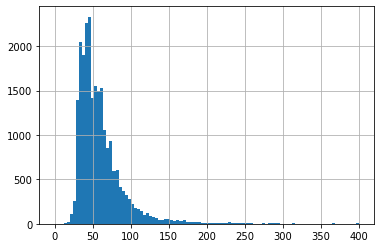

In [61]:
flat['total_area'].hist(bins=100, range = (0, 400))

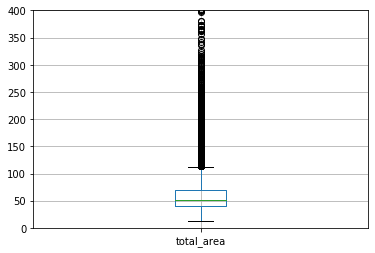

In [62]:
flat.boxplot(column='total_area');
plt.ylim(0, 400);
plt.show();

In [23]:
flat['last_price'].describe().astype('int')

count        23650
mean       6541126
std       10896399
min          12190
25%        3400000
50%        4650000
75%        6799000
max      763000000
Name: last_price, dtype: int64

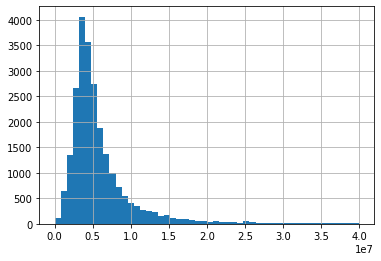

In [24]:
flat['last_price'].hist(bins=50, range = (0, 40000000))

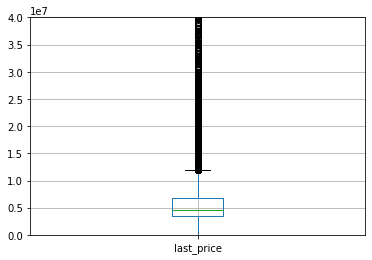

In [63]:
flat.boxplot(column='last_price');
plt.ylim(0, 40000000);
plt.show();

In [25]:
flat['rooms'].describe().astype('int')

count    23650
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

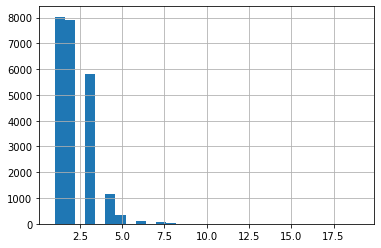

In [26]:
flat['rooms'].hist(bins=30, range = (1, 19))

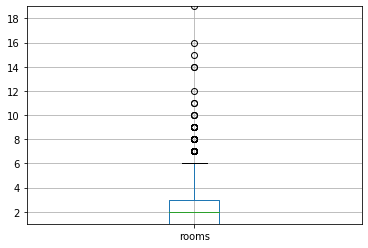

In [66]:
flat.boxplot(column='rooms');
plt.ylim(1, 19);
plt.show();

In [27]:
flat['ceiling_height'].min(),flat['ceiling_height'].max()

(1.0, 100.0)

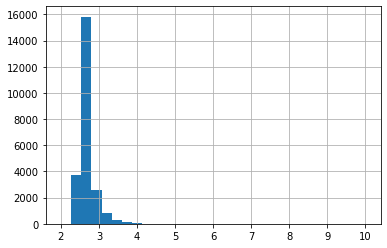

In [28]:
flat['ceiling_height'].hist(bins=30, range = (2, 10))

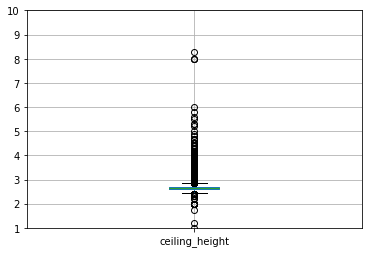

In [68]:
flat.boxplot(column='ceiling_height');
plt.ylim(1, 10);
plt.show();

Изучим время продажи квартиры. Построим гистограмму. Выявим среднее и медиану списка.

In [29]:
flat['days_exposition'].describe().astype('int')

count    20470
mean       180
std        219
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: int64

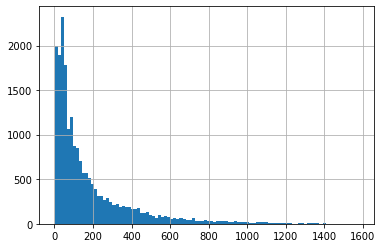

In [30]:
flat['days_exposition'].hist(bins=100, range = (1, 1580))

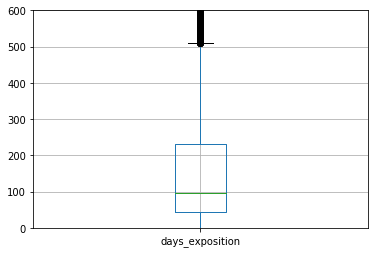

In [31]:
flat.boxplot(column='days_exposition')
plt.ylim(0, 600)
plt.show()

В среднем продажа квартиры занимает 180 дней. Считать продажу очень быстрой можно если она заняла менее 45 дней, необычно долгими продажи можно считать, если они заняли свыше  231 дня.

### Шаг 4.2. Убираем редкие и выбивающиеся значения

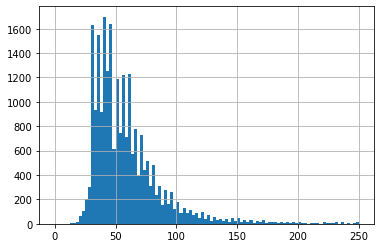

In [32]:
flat['total_area'].hist(bins=100, range = (0, 250))

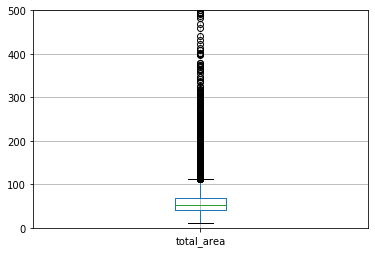

In [33]:
flat.boxplot(column='total_area')
plt.ylim(0, 500)
plt.show()

Площадь квартир более 200 метров уже редкость. Больше 250 практически нет. 
Применим верхнюю границу 150 метров, отбросим остальные значения мы не потеряем много данных.

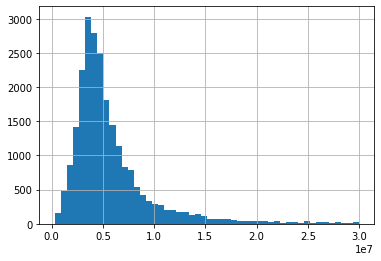

In [34]:
flat['last_price'].hist(bins=50, range = (300000, 30000000))

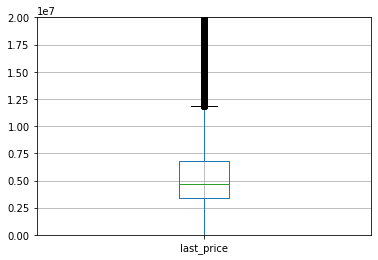

In [35]:
flat.boxplot(column='last_price')
plt.ylim(0, 20000000)
plt.show()

Цена квартир более 15 млн уже редкость. Больше 25 млн практически нет. Предлагаю отбросить значения свыше 15 млн.

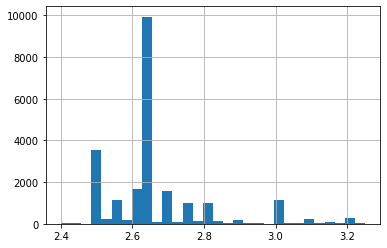

In [36]:
flat['ceiling_height'].hist(bins=30, range = (2.4, 3.25))

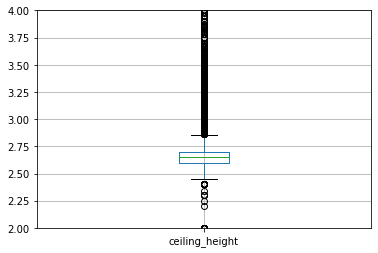

In [37]:
flat.boxplot(column='ceiling_height')
plt.ylim(2, 4)
plt.show()

Высота потолков более 2,75 метров уже редкость. Больше 4 метров практически нет, меньше 2.4 тоже. Думаю стоит отбросить значения свыше 4 м, так как в дальнейшем нам потребуется оценивать жилье в центре петербурга то данные от 3 до 4 возможно потребуются.

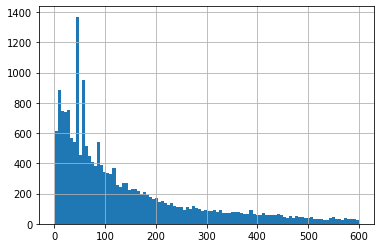

In [38]:
flat['days_exposition'].hist(bins=100, range = (1, 600))

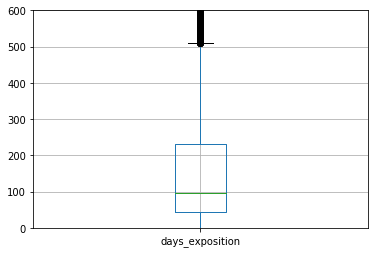

In [39]:
flat.boxplot(column='days_exposition')
plt.ylim(0, 600)
plt.show()

В редких случаях квартира продавалась свыше 500 дней. Применим верхнюю границу в 500 дней. 
Отбросим остальные значения мы не потеряем много данных.

Создаем список с хорошими значениями good stat

In [40]:
good_stat = flat.query('last_price <= 15000000 & total_area <= 150 & 2.4 <= ceiling_height <= 4 & days_exposition <= 500') 
good_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17923 entries, 1 to 23695
Data columns (total 33 columns):
total_images                17923 non-null int64
last_price                  17923 non-null int64
total_area                  17923 non-null int64
first_day_exposition        17923 non-null object
rooms                       17923 non-null int64
ceiling_height              17923 non-null float64
floors_total                17857 non-null float64
living_area                 16412 non-null float64
floor                       17923 non-null int64
is_apartment                17923 non-null bool
studio                      17923 non-null bool
open_plan                   17923 non-null bool
kitchen_area                16065 non-null float64
balcony                     17923 non-null float64
locality_name               17923 non-null object
airports_nearest            13656 non-null float64
cityCenters_nearest         13672 non-null float64
parks_around3000            13672 non-null fl

### Шаг 4.3 Какие факторы больше всего влияют на стоимость квартиры? 
1. Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
2. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
3. Также изучим зависимость от даты размещения: дня недели, месяца и года.

0.7434705864979106

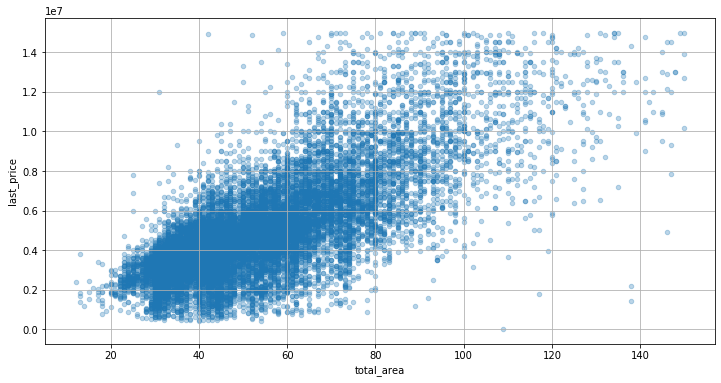

In [41]:
good_stat.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(12, 6), alpha=0.3)

good_stat['total_area'].corr(good_stat['last_price'])

На графике видно что стоимость сильно зависит от площади квартиры. Также это подверждается при расчете коэффициента корреляции.

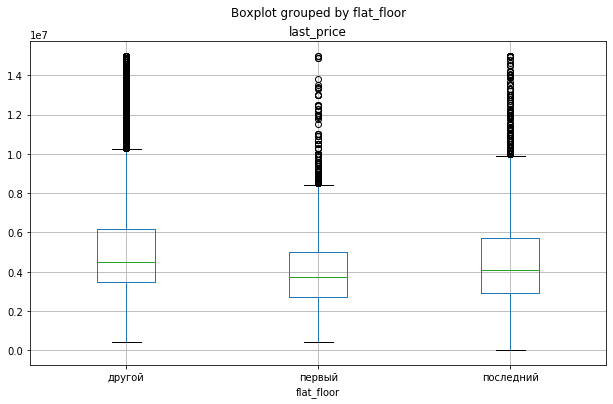

In [43]:
good_stat.boxplot(column='last_price', by='flat_floor', figsize=(10, 6))
plt.show()

Цена на квартиры на посднедних этажах и в категории другие имею примерно одинаковый диапозон цен. Квартиры на первых этаж обычно продаются по более низким ценам.

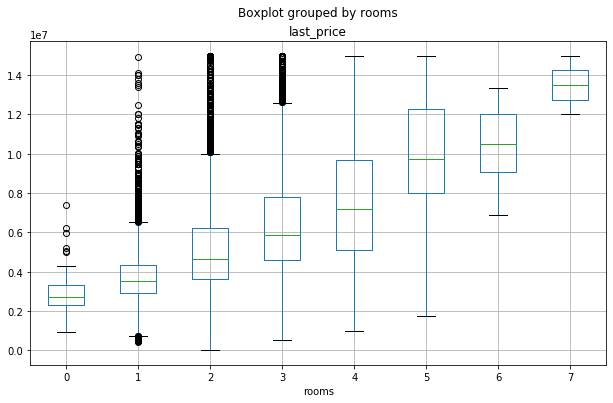

0.48077593041454536

In [71]:
good_stat.boxplot(column='last_price', by='rooms', figsize=(10, 6))
plt.show()
good_stat['rooms'].corr(good_stat['last_price'])

Чем больше комнат тем больше цена на квартиры. Зависимость не такая сильная как в случае с удаленностью от центра, но тоже значительная.

(2000000, 12000000)

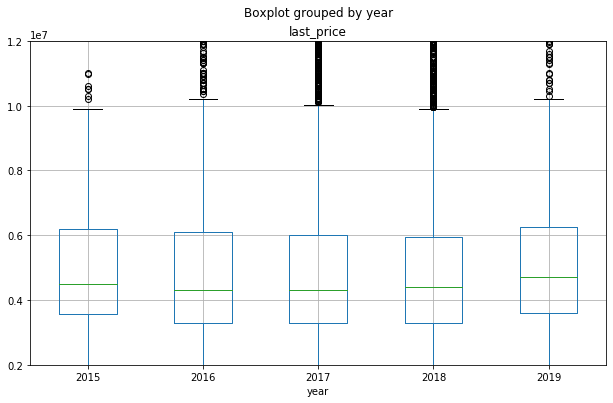

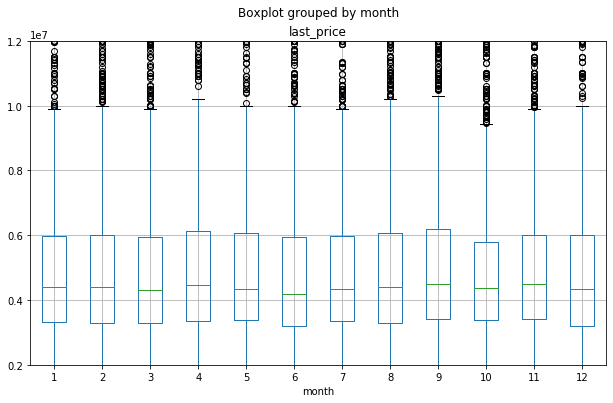

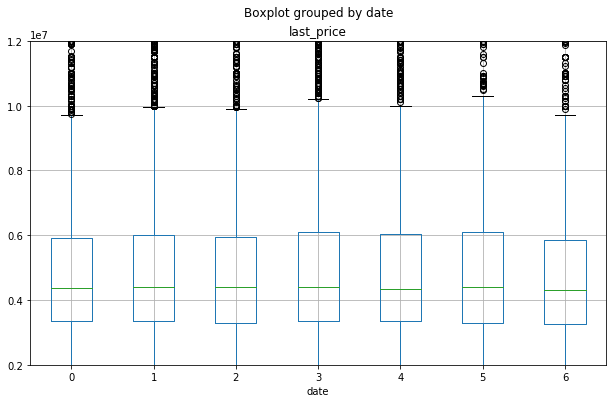

In [44]:
good_stat.boxplot(column='last_price', by='year',figsize=(10, 6));
plt.ylim(2000000, 12000000);
good_stat.boxplot(column='last_price', by='month',figsize=(10, 6));
plt.ylim(2000000, 12000000)
good_stat.boxplot(column='last_price', by='date',figsize=(10, 6));
plt.ylim(2000000, 12000000)

Цены квартиры больше в 2016 и 2019 году, низкие в 2015 и 2018. 
Наибольшие цены зафиксированы в апреле, августе и сентябре, наименьшая в октябре.
Наибольшие цены зафиксированы по объявлениям размещенным в четверг и субботу, наименьшие в понедельник.

### Шаг 4.4 Выделим ТОП-10 населённых пунктов с наибольшим числом объявлений. 

In [45]:
data_pivot = good_stat.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = ['count','mean'])
data_pivot.columns = ['count', 'mean_price']
data_pivot.sort_values(by='count',ascending=False).head(10)
#first_day_stat = area_stat.pivot_table(index= ['year','month'], values='last_prise', aggfunc='median')

,count,mean_price
locality_name,,
Санкт-Петербург,11677,106380.869658
поселок Мурино,515,86591.149515
поселок Шушары,385,78326.371429
Всеволожск,305,67043.688525
Колпино,292,74993.363014
поселок Парголово,286,89850.227273
Пушкин,267,100547.853933
деревня Кудрово,266,93189.928571
Гатчина,243,68349.086420


In [46]:
data_pivot.sort_values(by='mean_price',ascending=False).head(10)

,count,mean_price
locality_name,,
поселок Лисий Нос,2,114316.500000
Санкт-Петербург,11677,106380.869658
Зеленогорск,19,103595.526316
Сестрорецк,142,100846.894366
Пушкин,267,100547.853933
Кудрово,137,98907.664234
поселок Левашово,1,97674.000000
деревня Мистолово,9,97360.000000
деревня Кудрово,266,93189.928571


In [47]:
data_pivot.sort_values(by='mean_price',ascending=False).tail(10)

,count,mean_price
locality_name,,
поселок станции Лужайка,1,15000.000000
деревня Ям-Тесово,2,13797.000000
деревня Бор,1,13157.000000
поселок Тесово-4,1,12931.000000
деревня Малая Романовка,1,12878.000000
поселок Совхозный,2,12628.500000
деревня Выскатка,2,12335.000000
деревня Вахнова Кара,1,11842.000000
поселок станции Свирь,2,11481.000000


### Вывод
Согласно данным таблицы самая большая цена квадратного метра в п.Лисий нос 114316 руб. Количество объявлений небольшое(2), наверное дачи Петербургских чиновников.
В связи с этим большее внимание стоит уделить г.Санкт-Петербрг с средней ценой кв. метра 106380 руб. и количеством объявлений - 11677.

Наименьшая цена кв. метра зафиксирована в деревне Старополье - 11238 руб.

### Шаг 4.5 Выделим сегмент квартир в центре. 
Проанализируем параметры: площадь, цена, число комнат, высота потолков

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


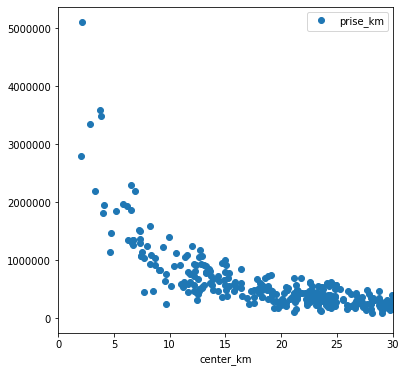

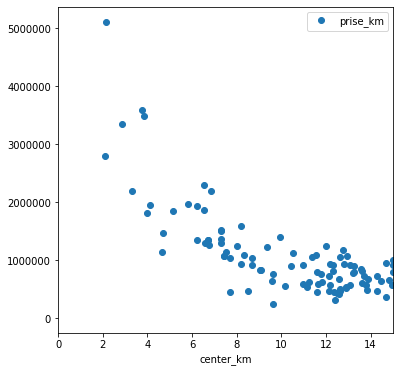

In [52]:
KM_IN_M = 100

petersburg_km = good_stat['cityCenters_nearest']

def km_to_center(petersburg_km):
    km = petersburg_km / KM_IN_M
    return km

good_stat['center_km'] = good_stat['cityCenters_nearest'].apply(km_to_center)
petersburg = good_stat.query('locality_name == "Санкт-Петербург"')
petersburg.head()
petersburg['prise_km'] = petersburg['last_price'] / petersburg['center_km']

petersburg.sort_values(by='center_km').plot(style='o', x='center_km',y='prise_km',figsize=(6,6));
plt.xlim(0,30);
plt.show();
petersburg.sort_values(by='center_km').plot(style='o', x='center_km',y='prise_km',figsize=(6,6))
plt.xlim(0,15);
plt.show();

Цена квартир начинает возрасть на расстоянии 6 км от центра. Возьмем эту величину как ориентир.

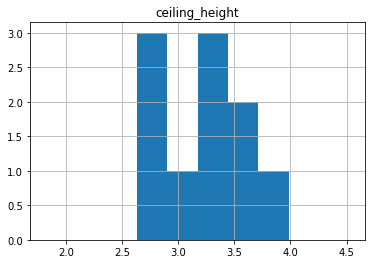

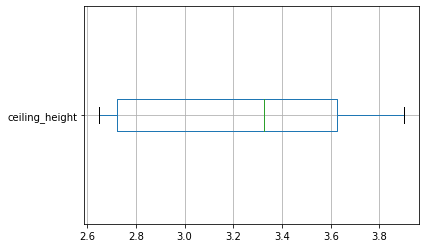

            ceiling_height  rooms  total_area
last_price                                   
5300000              2.650    3.0          49
5800000              3.700    1.0          33
6900000              2.650    2.0          47
7200000              2.935    2.5          76
8000000              3.400    3.0         106
9500000              2.650    2.0          81
9590000              3.300    2.0         108
10990000             3.900    3.0         100
11500000             3.700    1.0          48
13500000             3.350    3.0          97


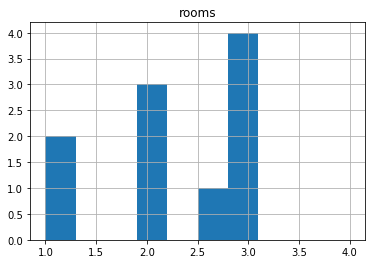

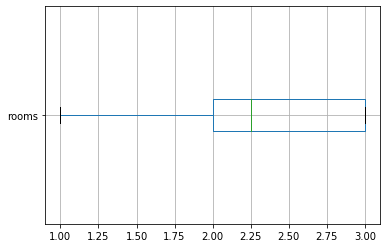

            ceiling_height  rooms  total_area
last_price                                   
5300000              2.650    3.0          49
5800000              3.700    1.0          33
6900000              2.650    2.0          47
7200000              2.935    2.5          76
8000000              3.400    3.0         106
9500000              2.650    2.0          81
9590000              3.300    2.0         108
10990000             3.900    3.0         100
11500000             3.700    1.0          48
13500000             3.350    3.0          97


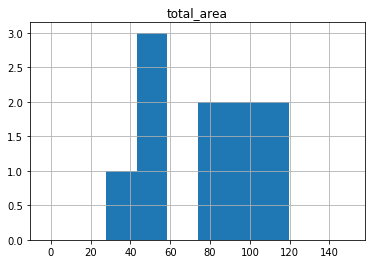

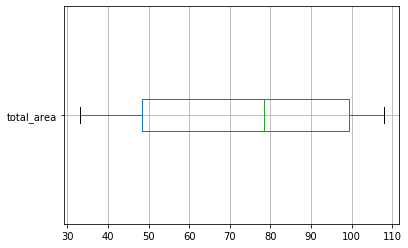

            ceiling_height  rooms  total_area
last_price                                   
5300000              2.650    3.0          49
5800000              3.700    1.0          33
6900000              2.650    2.0          47
7200000              2.935    2.5          76
8000000              3.400    3.0         106
9500000              2.650    2.0          81
9590000              3.300    2.0         108
10990000             3.900    3.0         100
11500000             3.700    1.0          48
13500000             3.350    3.0          97


In [77]:
petersburg_center = petersburg.query('center_km <= 6')
petersburg_hist = petersburg_center.pivot_table(index='last_price', values=['total_area', 'rooms', 'ceiling_height'], aggfunc='median')

for column in petersburg_hist:
    params = petersburg_hist[[column]].describe().T
    q1 = params['25%'][0]
    q2 = params['75%'][0]
    iqr = q2 - q1
    petersburg_hist[[column]].hist(range = (q1 -  iqr, q2 +  iqr))
    plt.show()
    petersburg_hist.boxplot(column, vert=False)
    plt.show()
    print(petersburg_hist)

Высота потолков влияет на цены на жилье. Основной рост наблюдается в диапазоне от 3 до 4м.

Количество комнат: количество комнат влияет на стоимость квартир, трехкомнантные квартиры чаще стоят дороже двух и однокомнатных.

Площадь один из основных параметром влияющих на цену квартиры. Значительный рост цены наблюдается от 80 м.

Удаленность от центра: примерно в 6 км от центра замечено резкое изменение цены и её дальнейший рост.

При этом есть исключения, похоже у кого-то большой аппетит. 
Среди дорогих квартир мы видим объявление за 115 млн руб, 1 комната и 48 метров площади. 

### Шаг 5. Общий вывод

Проанализировав данные, пришел к следующим выводам, они же легки в дальнейшее рассмотрение зависимости цены квартир от различных параметров.

- Цена квартиры более 15 млн уже редкость. Больше 25 млн практически не встречается.

- Площадь квартира до 150 метров.

- Высота потолков более 2,75 метров уже редкость. Больше 4 метров практически нет, меньше 2.4 тоже.

- В среднем продажа квартиры занимает 180 дней. 

- Считать продажу очень быстрой можно если она заняла менее 45 дней, необычно долгими продажи можно считать, если они заняли свыше 231 дня. 

- В редких случаях квартира продавалась свыше 500 дней. 

#### Зависимости от различных параметров.
**Площадь квартиры:** подтверждается сильная зависимость. Коэффициент корреляции - 0.74

**Этажность:** цена на квартиры на последних этажах и в категории «другие» имею примерно одинаковый диапазон цен. Квартиры на первых этаж обычно продаются по более низким ценам.

**Дата размещения:** Цены квартиры больше в 2016 и 2019 году, низкие в 2015 и 2018. 

**Цена:** Наибольшие цены зафиксированы в апреле, августе и сентябре, наименьшая в октябре.

Наибольшие цены зафиксированы по объявлениям, размещенным в четверг и субботу, наименьшие в понедельник.

**Комнаты:** Количество комнат, тем больше цена на квартиры. Зависимость не такая сильная как в случае с удаленностью от центра, но тоже значительная, коэффициент корреляции - 0,48

#### Анализ цены за метр.
Согласно данным таблицы самая большая цена квадратного метра в п. Лисий нос 114316 руб., но количество объявлений незначительное, всего два. 

В связи с этим большее внимание стоит уделить г. Санкт-Петербург с средней ценой кв. метра 106380 руб. и количеством объявлений - 11677.

Наименьшая цена кв. метра зафиксирована в деревне Старополье - 11238 руб.

Удаленность от центра: примерно в 6 км от центра замечено резкое изменение цены и её дальнейший рост.
Высота потолков влияет на цены на жилье в центре. Основной рост наблюдается в диапазоне от 3 до 4м.

Количество комнат: количество комнат влияет на стоимость квартир, трехкомнантные квартиры чаще стоят дороже двух и однокомнатных.

Площадь один из основного параметра влияющих на цену квартиры. Значительный рост цены наблюдается от 80 м.

При этом есть исключения, похоже у кого-то большой аппетит. Среди дорогих квартир мы видим объявление за 115 млн руб, 1 комната и 48 метров площади.
